#Load and Explore the Dataset

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/diabetes.csv'  # Update the path if necessary
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display dataset summary
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null

#Preprocessing the Data
We'll now prepare the data for dimensionality reduction. The steps include:

Separating Features and Target: Isolate the features (X) and target (y) columns.
Scaling the Features: Standardize the data (mean = 0, standard deviation = 1) to ensure all features are on the same scale. This step is critical for techniques like PCA, t-SNE, and UMAP.
Confirming the Scaled Data: Verify the scaled dataset statistics.

In [2]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data to a DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled data
print("First few rows of the scaled data:")
print(X_scaled_df.head())

# Confirm mean and standard deviation of scaled data
print("\nMean of each feature after scaling (should be ~0):")
print(X_scaled_df.mean())

print("\nStandard deviation of each feature after scaling (should be ~1):")
print(X_scaled_df.std())


First few rows of the scaled data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  

Mean of each feature after scaling (should be ~0):
Pregnancies                -6.476301e-17
Glucose                    -9.251859e-18
BloodPressure               1.503427e-17
SkinThickness               1.006140e-16
Insulin                    -3.006854e-17

#Apply and Visualize Randomized PCA
This technique reduces the dimensionality of the dataset while capturing the maximum variance in the data.

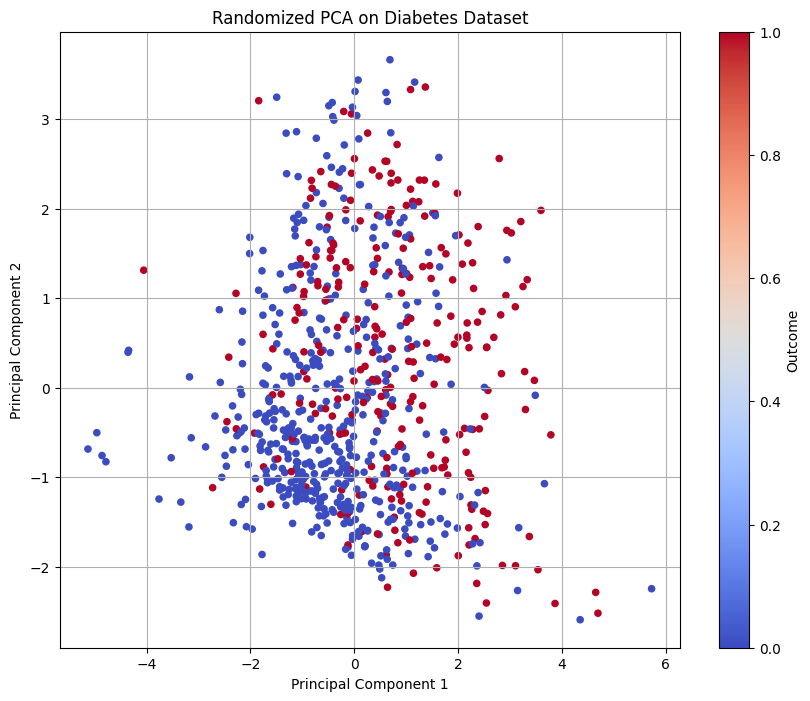

Explained variance ratio for each principal component:
[0.26179749 0.21640127]


In [3]:
# Import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions using Randomized PCA
n_components = 2  # Target dimensions
randomized_pca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
X_pca = randomized_pca.fit_transform(X_scaled)

# Visualize the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Randomized PCA on Diabetes Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Explained variance ratio
print("Explained variance ratio for each principal component:")
print(randomized_pca.explained_variance_ratio_)

#Apply and Visualize t-SNE
t-SNE is a nonlinear dimensionality reduction method particularly useful for visualization, as it captures local relationships effectively.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


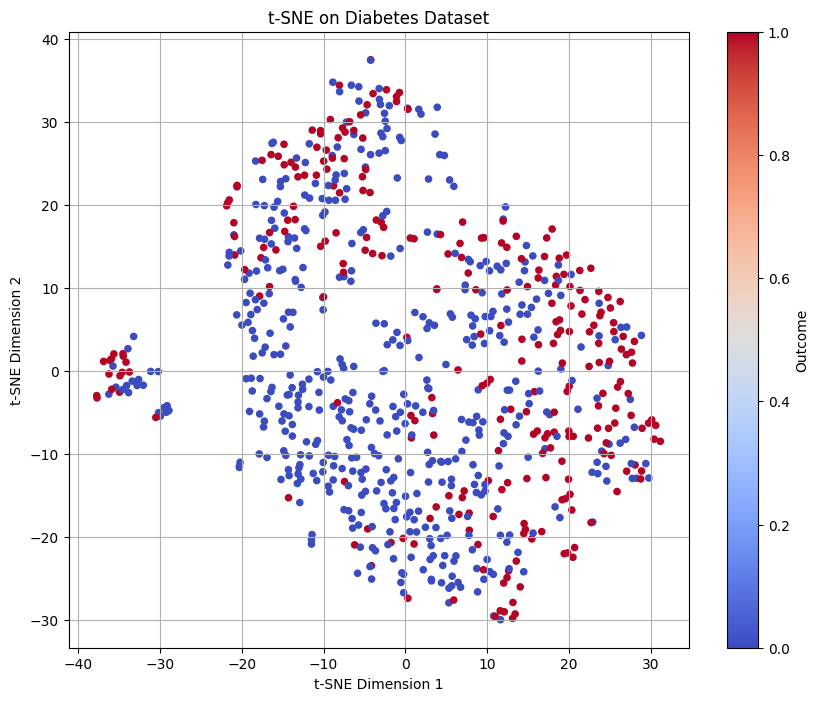

In [4]:
# Import t-SNE
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("t-SNE on Diabetes Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

#Apply and Visualize UMAP
UMAP (Uniform Manifold Approximation and Projection) is a nonlinear dimensionality reduction technique that preserves both local and global structures, often outperforming t-SNE in terms of scalability and efficiency.



In [5]:
# Install UMAP
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


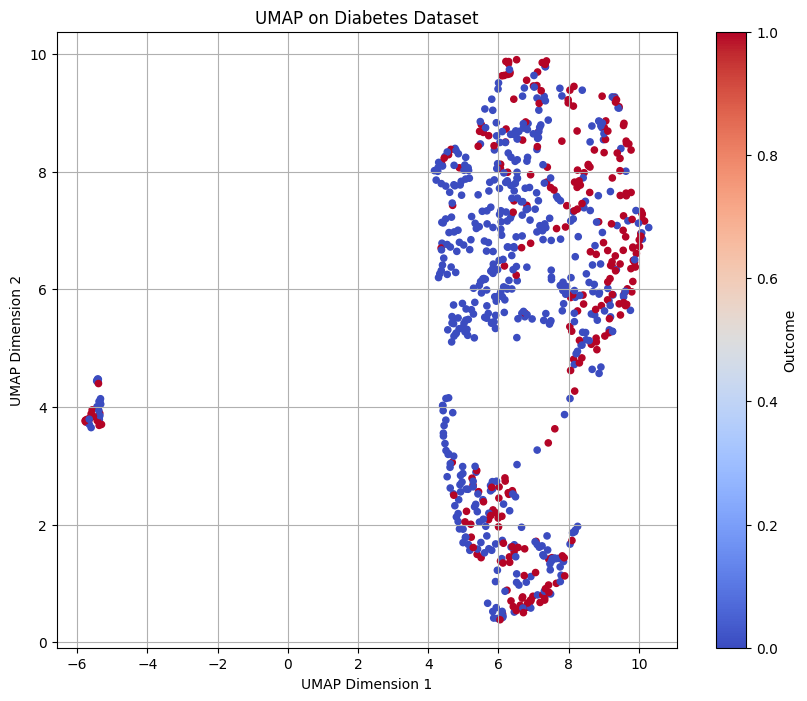

In [6]:
# Import UMAP
import umap.umap_ as umap

# Reduce dimensions using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Visualize the UMAP results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("UMAP on Diabetes Dataset")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

#Apply and Visualize ISOMAP
ISOMAP (Isometric Mapping) is another nonlinear dimensionality reduction technique that preserves geodesic distances, making it suitable for datasets with a manifold structure.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


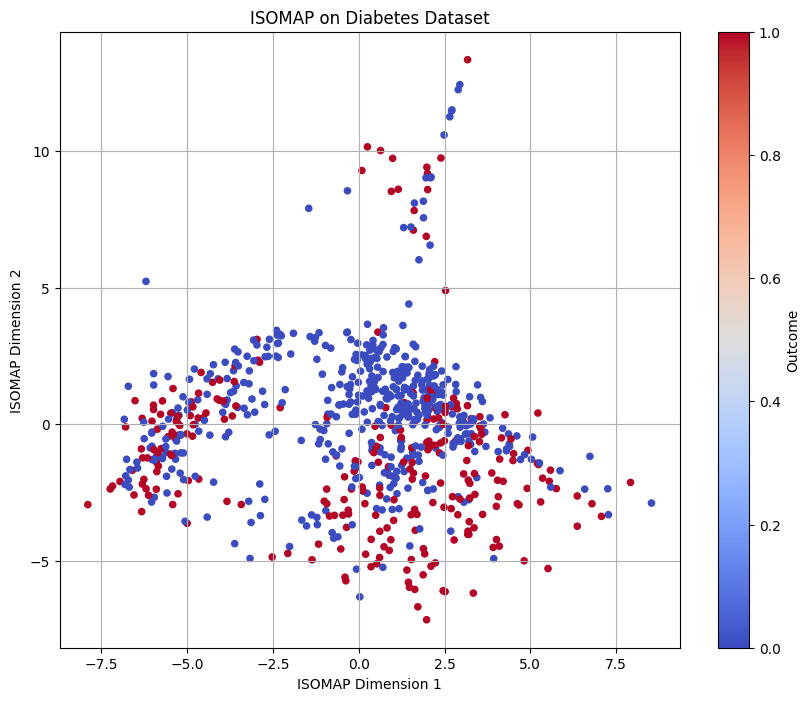

In [7]:
# Import ISOMAP
from sklearn.manifold import Isomap

# Reduce dimensions using ISOMAP
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

# Visualize the ISOMAP results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("ISOMAP on Diabetes Dataset")
plt.xlabel("ISOMAP Dimension 1")
plt.ylabel("ISOMAP Dimension 2")
plt.grid(True)
plt.show()

#Apply and Visualize Kernel PCA
Kernel PCA extends standard PCA by applying kernel functions, enabling it to capture nonlinear relationships in the data.

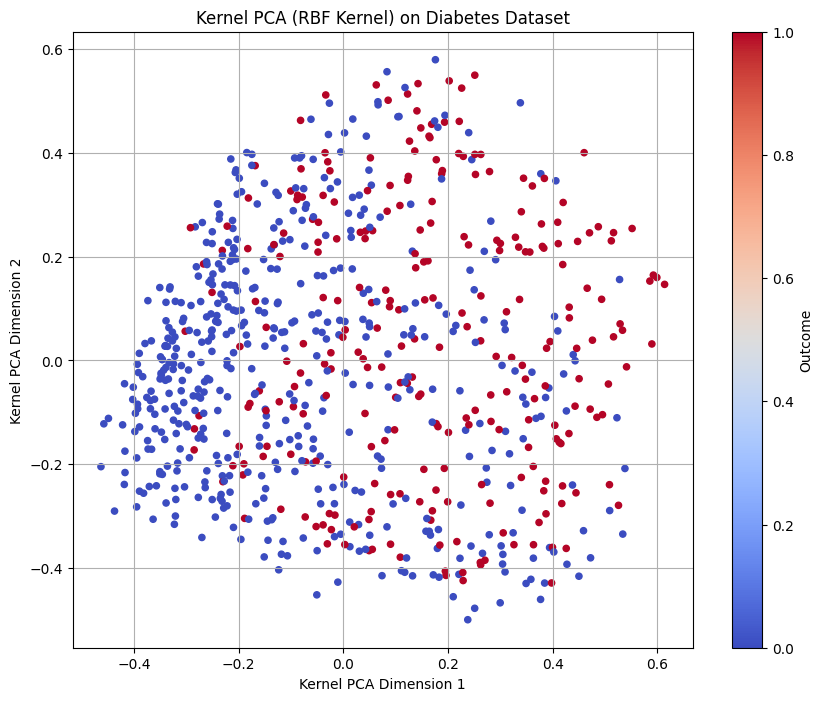

In [8]:
# Import Kernel PCA
from sklearn.decomposition import KernelPCA

# Reduce dimensions using Kernel PCA with an RBF kernel
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03, random_state=42)
X_kpca = kernel_pca.fit_transform(X_scaled)

# Visualize the Kernel PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Kernel PCA (RBF Kernel) on Diabetes Dataset")
plt.xlabel("Kernel PCA Dimension 1")
plt.ylabel("Kernel PCA Dimension 2")
plt.grid(True)
plt.show()

#Apply and Visualize Incremental PCA
Incremental PCA is a linear dimensionality reduction method that processes data in small batches, making it suitable for large datasets.

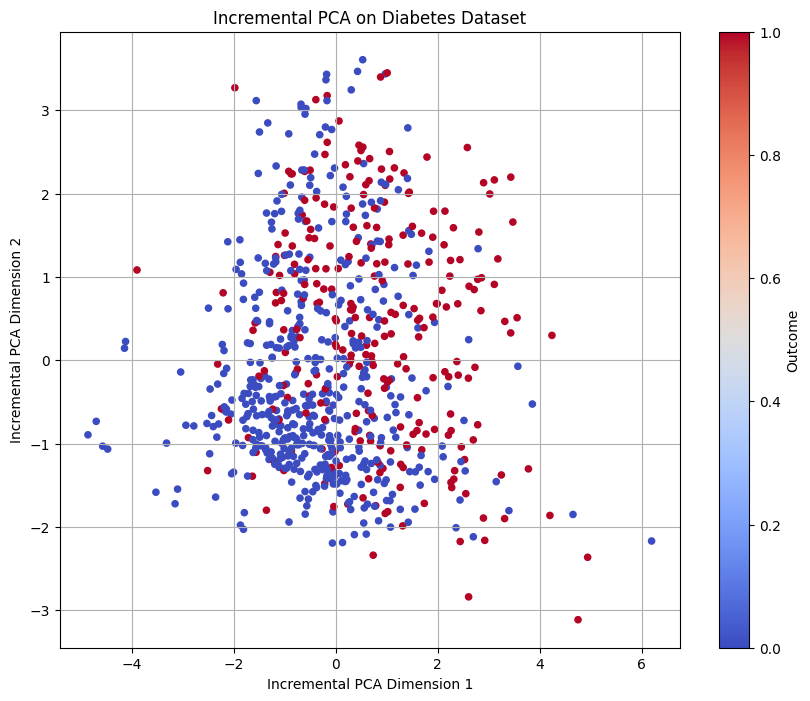

In [9]:
# Import Incremental PCA
from sklearn.decomposition import IncrementalPCA

# Reduce dimensions using Incremental PCA
n_components = 2  # Target dimensions
incremental_pca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = incremental_pca.fit_transform(X_scaled)

# Visualize the Incremental PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Incremental PCA on Diabetes Dataset")
plt.xlabel("Incremental PCA Dimension 1")
plt.ylabel("Incremental PCA Dimension 2")
plt.grid(True)
plt.show()

#Apply and Visualize Factor Analysis
Factor Analysis works by identifying latent variables (factors) that explain the correlations among observed features.

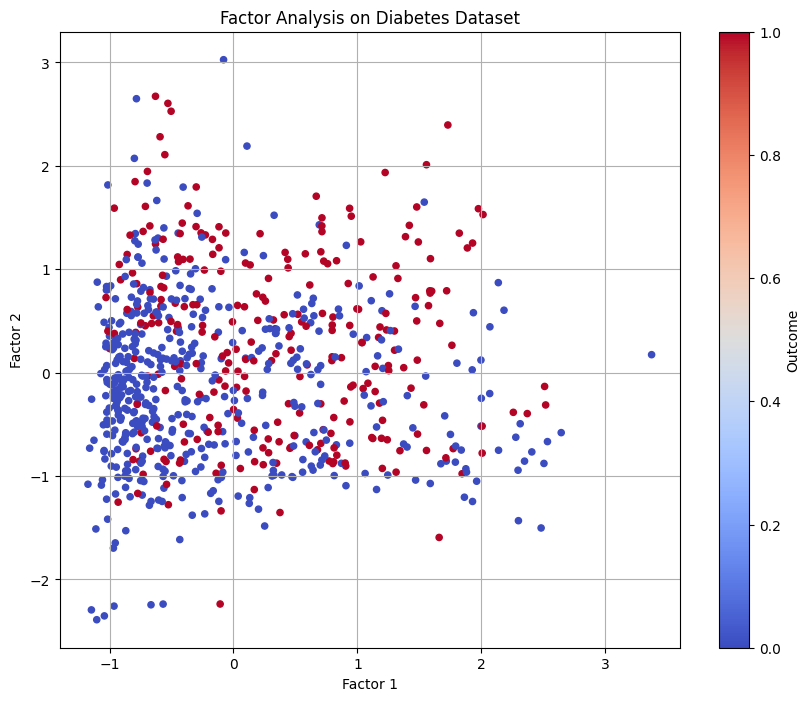

In [10]:
# Import Factor Analysis
from sklearn.decomposition import FactorAnalysis

# Reduce dimensions using Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X_scaled)

# Visualize the Factor Analysis results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Factor Analysis on Diabetes Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.grid(True)
plt.show()

#Apply and Visualize Autoencoders
Autoencoders are neural networks designed to compress the data into a lower-dimensional latent space and then reconstruct it. We’ll use the encoder part to extract the 2D representation.

In [11]:
# Install TensorFlow if necessary
!pip install tensorflow

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


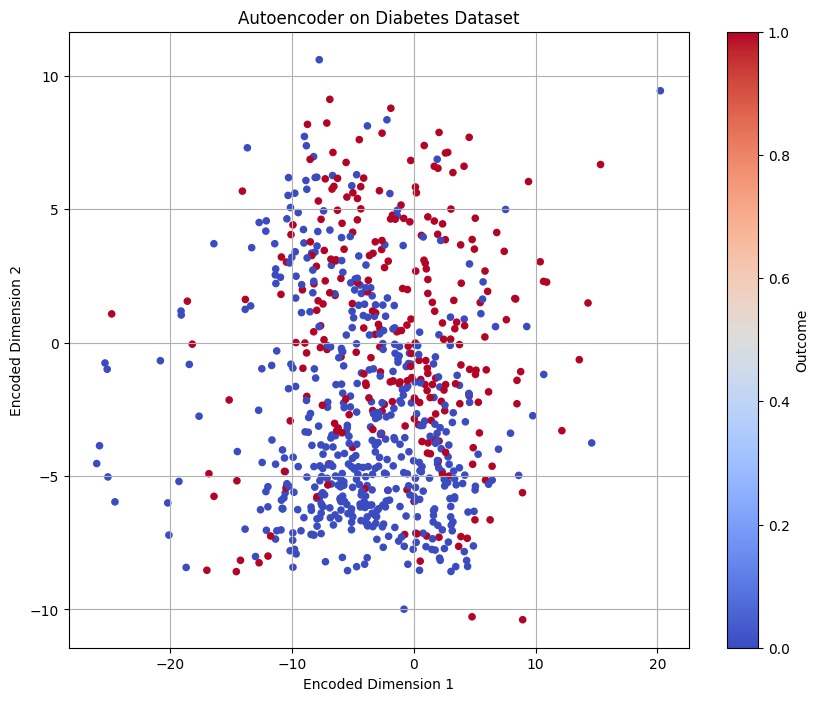

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the autoencoder model
input_dim = X_scaled.shape[1]  # Number of input features
encoding_dim = 2  # Number of dimensions to reduce to

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded_output = layers.Dense(encoding_dim, activation='linear')(encoded)

# Decoder
decoded = layers.Dense(32, activation='relu')(encoded_output)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded_output = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Combine into an autoencoder model
autoencoder = models.Model(inputs=input_layer, outputs=decoded_output)
encoder = models.Model(inputs=input_layer, outputs=encoded_output)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Reduce the data using the encoder
X_autoencoded = encoder.predict(X_scaled)

# Visualize the autoencoded results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Autoencoder on Diabetes Dataset")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.grid(True)
plt.show()


#Summarize and Compare Results
Now that we've completed dimensionality reduction using various techniques, the final step is to analyze and summarize the results.

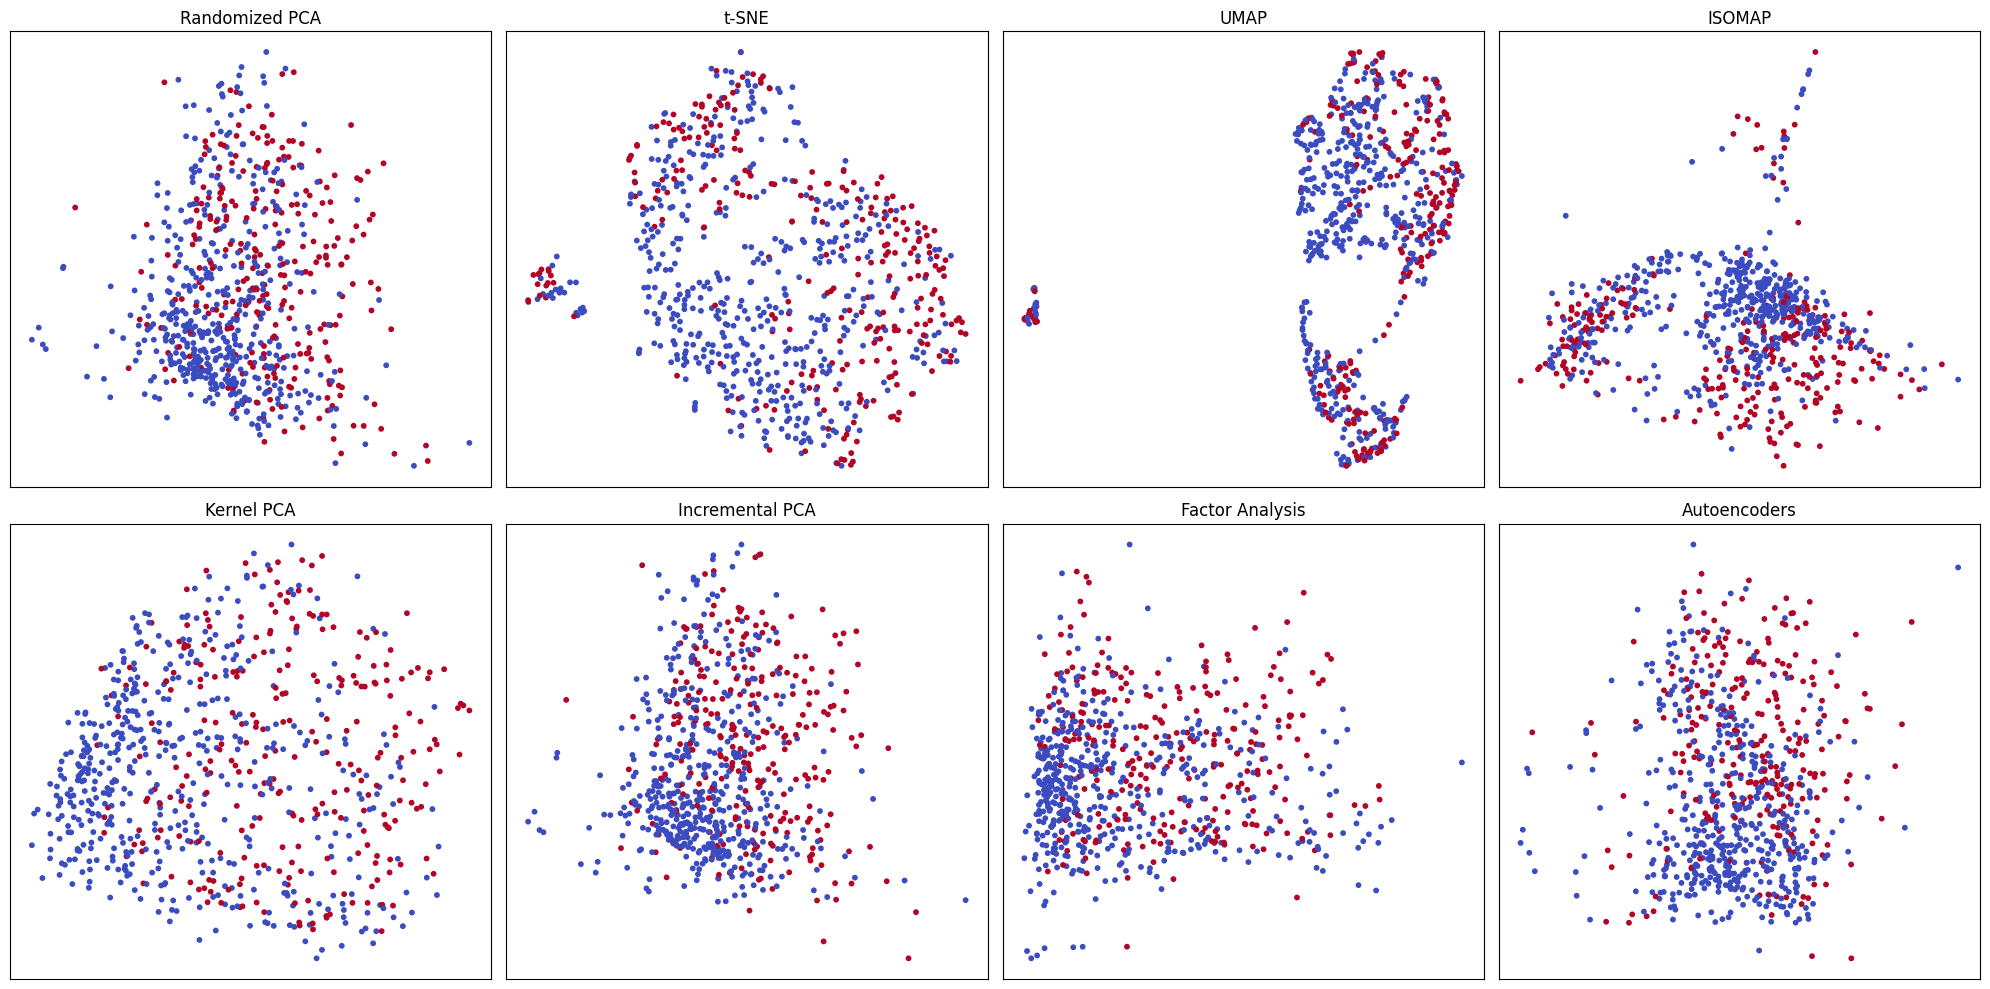

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
techniques = [
    ("Randomized PCA", X_pca),
    ("t-SNE", X_tsne),
    ("UMAP", X_umap),
    ("ISOMAP", X_isomap),
    ("Kernel PCA", X_kpca),
    ("Incremental PCA", X_ipca),
    ("Factor Analysis", X_fa),
    ("Autoencoders", X_autoencoded),
]

for ax, (title, data) in zip(axes.flat, techniques):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='coolwarm', s=10)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
